# **Import librares**

In [ ]:
!pip install Keras-Preprocessing
!pip install ktrain
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as px
import pickle
import joblib
import urllib
import requests
import ktrain
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
from keras.regularizers import l2
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 66.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 72.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 kB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 51.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataFrame=pd.read_csv("/content/drive/MyDrive/nlp_project/Suicide_Detection.csv", engine='python', encoding='UTF-8')
dataFrame

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


# **Data Cleaning**

In [ ]:
dataFrame['text']=dataFrame['text'].fillna("") 
dataFrame.isna().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

# **Preprocessing**

In [ ]:
#Lower Case Conversion
dataFrame['lower_case_text']= dataFrame['text'].apply(lambda x: x.lower())

# Tokenization
regExTokenizer = RegexpTokenizer(r'\w+')
dataFrame['tokens'] = dataFrame.apply(lambda row: regExTokenizer.tokenize(row['lower_case_text']), axis=1)  

# Stop Words Removal
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.remove('here')
stop_words.remove('some')
dataFrame['stop_words_removed'] = dataFrame['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
dataFrame['stop_words_removed'] = dataFrame['stop_words_removed'].astype('str')

# Length based Filtering
dataFrame['short_word'] = dataFrame['stop_words_removed'].str.findall('\w{3,}')
dataFrame['string']=dataFrame['short_word'].str.join(' ') 

# Non-English Words Removal
english_words = set(nltk.corpus.words.words())
for word in reuters.words():
    english_words.add(word)
for word in brown.words():
    english_words.add(word)
for word in gutenberg.words():
    english_words.add(word)
dataFrame['english_only'] = dataFrame['string'].apply(lambda x: " ".join(word for word in x.split() if word in english_words))

# Lemmatization
dataFrame['text'] = dataFrame['english_only'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
dataFrame.head(10)

,Unnamed: 0,text,class,lower_case_text,tokens,stop_words_removed,short_word,string,english_only
0,2,wife threatening left wife good cheated twice ...,suicide,ex wife threatening suiciderecently i left my ...,"[ex, wife, threatening, suiciderecently, i, le...","['ex', 'wife', 'threatening', 'suiciderecently...","[wife, threatening, suiciderecently, left, wif...",wife threatening suiciderecently left wife goo...,wife threatening left wife good cheated twice ...
1,3,weird get affected compliment coming someone k...,non-suicide,am i weird i don't get affected by compliments...,"[am, i, weird, i, don, t, get, affected, by, c...","['weird', 'get', 'affected', 'compliments', 'c...","[weird, get, affected, compliments, coming, so...",weird get affected compliments coming someone ...,weird get affected compliments coming someone ...
2,4,finally almost never hear bad year ever swear ...,non-suicide,finally 2020 is almost over... so i can never ...,"[finally, 2020, is, almost, over, so, i, can, ...","['finally', '2020', 'almost', 'never', 'hear',...","[finally, 2020, almost, never, hear, 2020, bad...",finally 2020 almost never hear 2020 bad year e...,finally almost never hear bad year ever swear ...
3,8,need help cry hard,suicide,i need helpjust help me im crying so hard,"[i, need, helpjust, help, me, im, crying, so, ...","['need', 'helpjust', 'help', 'im', 'crying', '...","[need, helpjust, help, crying, hard]",need helpjust help crying hard,need help crying hard
4,9,name struggling year afraid past year thought ...,suicide,"i’m so losthello, my name is adam (16) and i’v...","[i, m, so, losthello, my, name, is, adam, 16, ...","['losthello', 'name', 'adam', '16', 'strugglin...","[losthello, name, adam, struggling, years, afr...",losthello name adam struggling years afraid pa...,name struggling years afraid past years though...
5,11,dont know even here feel like nothing nowhere ...,suicide,honetly idki dont know what im even doing here...,"[honetly, idki, dont, know, what, im, even, do...","['honetly', 'idki', 'dont', 'know', 'im', 'eve...","[honetly, idki, dont, know, even, here, feel, ...",honetly idki dont know even here feel like not...,dont know even here feel like nothing nowhere ...
6,12,trigger warning excuse self inflicted burn kno...,suicide,[trigger warning] excuse for self inflicted bu...,"[trigger, warning, excuse, for, self, inflicte...","['trigger', 'warning', 'excuse', 'self', 'infl...","[trigger, warning, excuse, self, inflicted, bu...",trigger warning excuse self inflicted burns kn...,trigger warning excuse self inflicted burns kn...
7,13,end tonight anymore quit,suicide,it ends tonight.i can’t do it anymore. \ni quit.,"[it, ends, tonight, i, can, t, do, it, anymore...","['ends', 'tonight', 'anymore', 'quit']","[ends, tonight, anymore, quit]",ends tonight anymore quit,ends tonight anymore quit
8,16,everyone want edgy making self conscious feel ...,non-suicide,"everyone wants to be ""edgy"" and it's making me...","[everyone, wants, to, be, edgy, and, it, s, ma...","['everyone', 'wants', 'edgy', 'making', 'self'...","[everyone, wants, edgy, making, self, consciou...",everyone wants edgy making self conscious feel...,everyone wants edgy making self conscious feel...
9,18,life year year old balding male hairline trash...,suicide,my life is over at 20 years oldhello all. i am...,"[my, life, is, over, at, 20, years, oldhello, ...","['life', '20', 'years', 'oldhello', '20', 'yea...","[life, years, oldhello, year, old, balding, ma...",life years oldhello year old balding male hair...,life years year old balding male hairline tras...


## Visualization

<Axes: xlabel='class'>

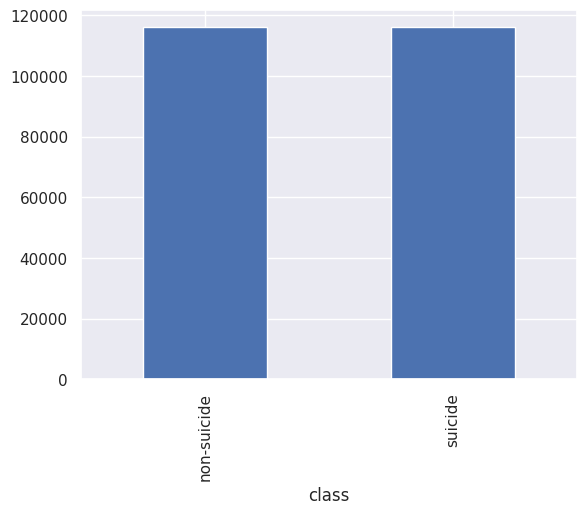

In [ ]:
dataFrame.groupby('class').size().plot(kind='bar')

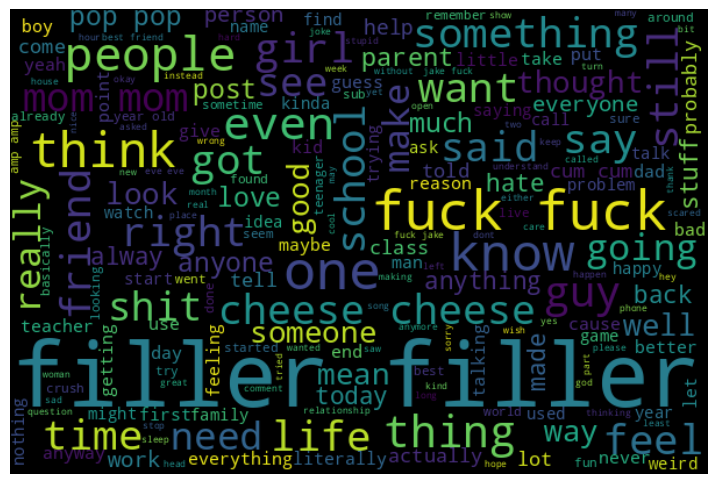

In [ ]:
non_suicide_terms = ' '.join(dataFrame[dataFrame['class'] == 'non-suicide']['text'])
word_cloud = WordCloud(width=600, height=400, random_state=21, max_font_size=100).generate(non_suicide_terms)
plot.figure(figsize=(9, 7))
plot.imshow(word_cloud, interpolation="bilinear")
plot.axis('off')
plot.show()

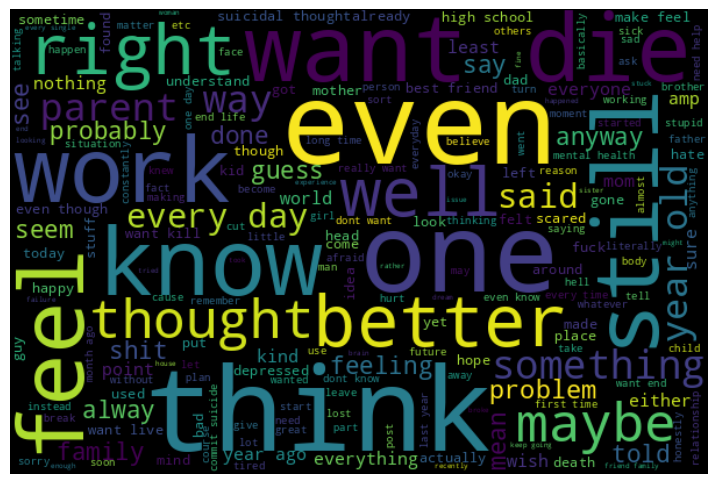

In [ ]:
suicide_terms = ' '.join(dataFrame[dataFrame['class'] == 'suicide']['text'])
word_cloud = WordCloud(width=600, height=400, random_state=21, max_font_size=100).generate(suicide_terms)
plot.figure(figsize=(9, 7))
plot.imshow(word_cloud, interpolation="bilinear")
plot.axis('off')
plot.show()

## **Applying N-gram**

In [ ]:
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(dataFrame['text'], dataFrame['class'], test_size=0.25, random_state=42)

# Vectorize the text using the CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
vec_train_x = count_vectorizer.fit_transform(train_x)
vec_test_x = count_vectorizer.transform(test_x)

# Transform the counts into TF-IDF features using the TfidfTransformer
tfidf_transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
trans_train_x = tfidf_transformer.fit_transform(vec_train_x)
trans_test_x = tfidf_transformer.transform(vec_test_x)

# Print the shapes of the training and testing sets
print(trans_train_x.shape, trans_test_x.shape, train_y.shape, test_y.shape)

(174055, 2518120) (58019, 2518120) (174055,) (58019,)


# **Machine Learning Models**

# **Logistic Regression**

In [ ]:
logisticRegression = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
logisticRegression.fit(trans_train_x, train_y)
y_pred_lr = logisticRegression.predict(trans_test_x)
print("Logistic Regression Accuracy : ",(accuracy_score(test_y,y_pred_lr)))
print(classification_report(test_y, y_pred_lr))

Logistic Regression Accuracy :  0.9334183629500681
              precision    recall  f1-score   support

 non-suicide       0.94      0.93      0.93     29074
     suicide       0.93      0.94      0.93     28945

    accuracy                           0.93     58019
   macro avg       0.93      0.93      0.93     58019
weighted avg       0.93      0.93      0.93     58019



In [ ]:
scores = cross_val_score(logisticRegression, trans_train_x,train_y, cv=5)  
print ("Cross Validation Scores:", scores)

Cross Validation Scores: [0.93183189 0.93191807 0.93056792 0.92895924 0.92982103]




## **Naive Bayes(Multinomial)**

In [ ]:
naive_bayes_multinomial = MultinomialNB()
naive_bayes_multinomial.fit(trans_train_x, train_y)
y_pred_nbm = naive_bayes_multinomial.predict(trans_test_x)
print("Naive Bayes Accuracy : "+str(accuracy_score(test_y,y_pred_nbm)))
print(classification_report(test_y, y_pred_nbm))

Naive Bayes Accuracy : 0.7878281252693083
              precision    recall  f1-score   support

 non-suicide       0.99      0.58      0.73     29074
     suicide       0.70      0.99      0.82     28945

    accuracy                           0.79     58019
   macro avg       0.85      0.79      0.78     58019
weighted avg       0.85      0.79      0.78     58019



In [ ]:
scores = cross_val_score(naive_bayes_multinomial, trans_train_x,train_y, cv=5)   
print ("Cross Validated Scores:", scores)

Cross Validated Scores: [0.78897475 0.79006636 0.78736606 0.78653299 0.78917584]


# **Comparison Between ML Models**

In [ ]:
compare = pd.DataFrame({'Logistic Regression': [accuracy_score(test_y,y_pred_lr)*100,f1_score(test_y,y_pred_lr,average='macro')*100,recall_score(test_y, y_pred_lr,average='micro')*100,precision_score(test_y, y_pred_lr,average='micro')*100],
                           'Naive Bayes':[accuracy_score(test_y,y_pred_nbm)*100,f1_score(test_y,y_pred_nbm,average='macro')*100,recall_score(test_y, y_pred_nbm,average='micro')*100,precision_score(test_y, y_pred_nbm,average='micro')*100]
})
compare.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
compare.head()

,Logistic Regression,Naive Bayes
Accuracy,93.341836,78.782813
F1_score,93.341835,77.875226
Recall,93.341836,78.782813
Precision,93.341836,78.782813


# **Deep Learning Models**

In [ ]:
vocab_size = 6000
max_text_length = 60

# Tokenize the text
tokenizerForDL = Tokenizer(num_words=vocab_size)
tokenizerForDL.fit_on_texts(dataFrame['text'].values)
word_index_len = len(tokenizerForDL.word_index) + 1
print(word_index_len)
seqs = tokenizerForDL.texts_to_sequences(dataFrame['text'].values)

# Pad the sequences
DL_x = pad_sequences(seqs, maxlen=max_text_length)

# Print the shape of X_deep_learning
print(DL_x.shape[1])

36358
60


In [ ]:
with open('tokenizer.pickle', 'wb') as file:
    pickle.dump(tokenizerForDL, file)
dataFrame.loc[dataFrame['class'] == 'suicide' , 'LABEL'] = 0     
dataFrame.loc[dataFrame['class'] == 'non-suicide', 'LABEL'] = 1              
     
labels = to_categorical(dataFrame['LABEL'], num_classes=2)
print(labels[:])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
# Split the data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(DL_x, labels, test_size=0.25, random_state=42)

# Print the shapes of the resulting arrays
print((train_x.shape, train_y.shape, test_x.shape, test_y.shape))

((174055, 60), (174055, 2), (58019, 60), (58019, 2))


# **LSTM 1-Layer**

In [ ]:
# Define the hyperparameters
epochs = 10
embedding_dim = 120
batch_size = 128

# Build the model architecture
lstm_model1 = Sequential()
lstm_model1.add(Embedding(vocab_size, embedding_dim, input_length=DL_x.shape[1]))
lstm_model1.add(SpatialDropout1D(0.8))
lstm_model1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))
lstm_model1.add(Dropout(0.5))
lstm_model1.add(Flatten())
lstm_model1.add(Dense(64, activation='relu'))
lstm_model1.add(Dropout(0.5))
lstm_model1.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = tf.optimizers.Adam()
loss = 'binary_crossentropy'
metrics = ['acc']
lstm_model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print a summary of the model architecture
print(lstm_model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 120)           720000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 120)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1010400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
cb_checkpoint = ModelCheckpoint(filepath="lstm-1-layer-model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
cb_earlyStopping = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
cb_reduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)
cbs=[cb_checkpoint, cb_earlyStopping, cb_reduceLR]
lstm_model1_history = lstm_model1.fit(train_x, train_y, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=cbs)

Epoch 1/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2815 - acc: 0.8917
Epoch 1: val_acc improved from -inf to 0.92141, saving model to lstm-1-layer-model.h5
1224/1224 [==============================] - 612s 491ms/step - loss: 0.2815 - acc: 0.8917 - val_loss: 0.2036 - val_acc: 0.9214 - lr: 0.0010
Epoch 2/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2257 - acc: 0.9166
Epoch 2: val_acc improved from 0.92141 to 0.92658, saving model to lstm-1-layer-model.h5
1224/1224 [==============================] - 551s 450ms/step - loss: 0.2257 - acc: 0.9166 - val_loss: 0.1924 - val_acc: 0.9266 - lr: 0.0010
Epoch 3/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2146 - acc: 0.9199
Epoch 3: val_acc did not improve from 0.92658
1224/1224 [==============================] - 543s 443ms/step - loss: 0.2146 - acc: 0.9199 - val_loss: 0.1933 - val_acc: 0.9262 - lr: 0.0010
Epoch 4/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2093 -

In [ ]:
lstm_model1_results = lstm_model1.evaluate(test_x, test_y, verbose=False)
print('--------LSTM 1 Layer Model Results-------------')
print(f'Accuracy : {100*lstm_model1_results[1]}%')
print(f'Loss : {lstm_model1_results[0]}')

--------LSTM 1 Layer Model Results-------------
Accuracy : 92.66619682312012%
Loss : 0.20035091042518616


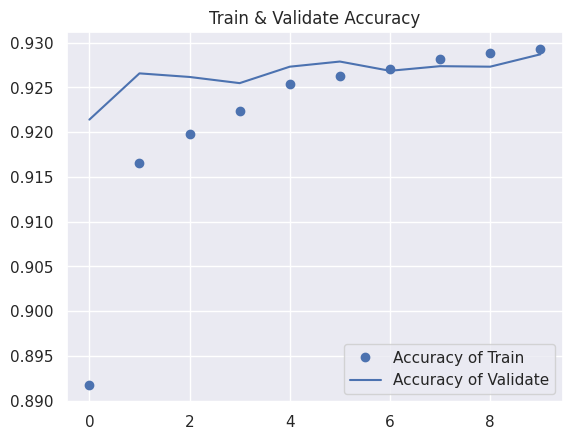

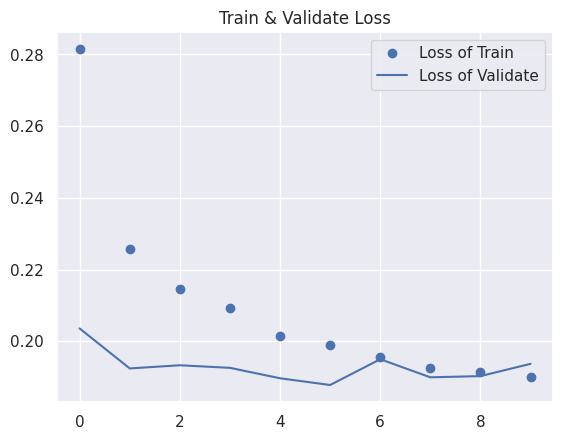

In [ ]:
accuracy_score = lstm_model1_history.history['acc']                        
validate_accuracy_score = lstm_model1_history.history['val_acc']
plot.plot(accuracy_score, 'bo', label='Accuracy of Train')
plot.plot(validate_accuracy_score, 'b', label='Accuracy of Validate')
plot.title('Train & Validate Accuracy')
plot.legend()                                           

plot.figure()
loss_score = lstm_model1_history.history['loss']
validate_loss_score = lstm_model1_history.history['val_loss']
plot.plot(loss_score, 'bo', label='Loss of Train')
plot.plot(validate_loss_score, 'b', label='Loss of Validate')
plot.title('Train & Validate Loss')
plot.legend()
plot.show()

In [ ]:
# Load tokenizer object
with open('/content/tokenizer.pickle', 'rb') as file:
    pickle_tokenizer = pickle.load(file)

lstm_1_model = load_model('/content/lstm-1-layer-model.h5')
lstm_1_model.save('/content/drive/MyDrive/nlp_project/lstm-1-layer.h5') 

post = ['I will kill myself ']
print(post[0])
post = pickle_tokenizer.texts_to_sequences(post)
post = pad_sequences(post, maxlen=60, dtype='int32')

pred = lstm_1_model.predict(post,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post")

post1 = ['I am happy with myself😀']
print(post1[0])
post1 = pickle_tokenizer.texts_to_sequences(post1)
post1 = pad_sequences(post1, maxlen=60, dtype='int32')

pred = lstm_1_model.predict(post1,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post")

I will kill myself 
1/1 [==============================] - 0s 486ms/step
It is a Suicide Post
I am happy with myself😀
1/1 [==============================] - 0s 55ms/step
It is a Non Suicide Post


## **CNN+LSTM**

In [ ]:
# Set hyperparameters
epochs = 10
embedding_dim = 120
batch_size = 128

# Define the model
lstm_cnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=DL_x.shape[1]),
    SpatialDropout1D(0.8),
    Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=6, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
optimizer = tf.optimizers.Adam()
loss = 'binary_crossentropy'
metrics = ['acc']
lstm_cnn_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print the model summary
print(lstm_cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 120)           720000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 60, 120)          0         
 lDropout1D)                                                     
                                                                 
 conv1d (Conv1D)             (None, 60, 64)            46144     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 32)            12320     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 32)          

In [ ]:
cb_checkpoint = ModelCheckpoint(filepath="cnn+lstm-model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
cb_earlyStopping = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
cb_reduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)
cbs=[cb_checkpoint, cb_earlyStopping, cb_reduceLR]
cnn_lstm_history = lstm_cnn_model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=cbs)

Epoch 1/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2722 - acc: 0.8958
Epoch 1: val_acc improved from -inf to 0.92210, saving model to cnn+lstm-model.h5
1224/1224 [==============================] - 310s 239ms/step - loss: 0.2722 - acc: 0.8958 - val_loss: 0.2000 - val_acc: 0.9221 - lr: 0.0010
Epoch 2/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2189 - acc: 0.9194
Epoch 2: val_acc improved from 0.92210 to 0.92279, saving model to cnn+lstm-model.h5
1224/1224 [==============================] - 260s 212ms/step - loss: 0.2189 - acc: 0.9194 - val_loss: 0.2045 - val_acc: 0.9228 - lr: 0.0010
Epoch 3/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2080 - acc: 0.9231
Epoch 3: val_acc improved from 0.92279 to 0.92336, saving model to cnn+lstm-model.h5
1224/1224 [==============================] - 258s 210ms/step - loss: 0.2080 - acc: 0.9231 - val_loss: 0.2044 - val_acc: 0.9234 - lr: 0.0010
Epoch 4/10
1224/1224 [===========================

In [ ]:
cnn_lstm_results = lstm_cnn_model.evaluate(test_x, test_y, verbose=False)
print('--------CNN+LSTM Model Results-------------')
print(f'Accuracy : {100*cnn_lstm_results[1]}%')
print(f'Loss : {cnn_lstm_results[0]}')

--------CNN+LSTM Model Results-------------
Accuracy : 92.46109127998352%
Loss : 0.2161363661289215


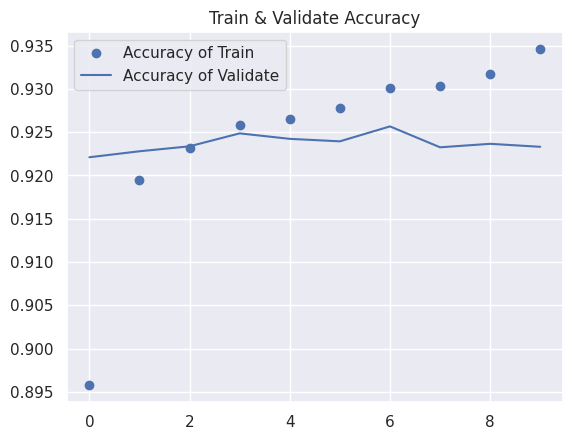

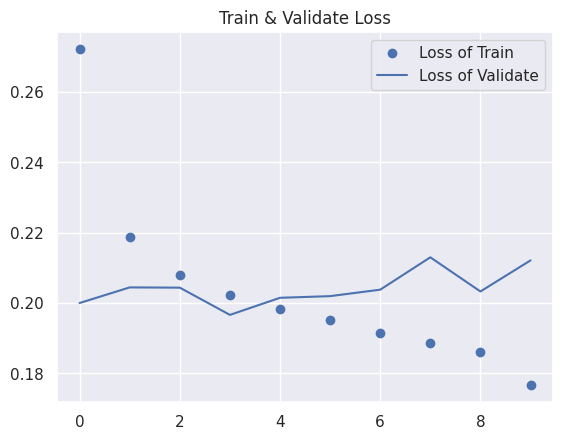

In [ ]:
accuracy_score = cnn_lstm_history.history['acc']                          
validate_accuracy_score = cnn_lstm_history.history['val_acc']
plot.plot(accuracy_score, 'bo', label='Accuracy of Train')
plot.plot(validate_accuracy_score, 'b', label='Accuracy of Validate')
plot.title('Train & Validate Accuracy')
plot.legend()                                           

plot.figure()
loss_score = cnn_lstm_history.history['loss']
validate_loss_score = cnn_lstm_history.history['val_loss']
plot.plot(loss_score, 'bo', label='Loss of Train')
plot.plot(validate_loss_score, 'b', label='Loss of Validate')
plot.title('Train & Validate Loss')
plot.legend()
plot.show() 

In [ ]:
# Load tokenizer object
with open('tokenizer.pickle', 'rb') as handle:
    pickle_tokenizer = pickle.load(handle)
    
lstm_cnn_model = load_model('/content/cnn+lstm-model.h5')
lstm_cnn_model.save('/content/drive/MyDrive/nlp_project/cnn-lstm.h5') 

post = ['I will be happy always']
print(post[0])
post_token = pickle_tokenizer.texts_to_sequences(post)
post_pad = pad_sequences(post_token, maxlen=60, dtype='int32')

pred = lstm_cnn_model.predict(post_pad,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post: ")

post1 = ['I will kill myself😩']
print(post1[0])
post1_token = pickle_tokenizer.texts_to_sequences(post1)
post1_pad = pad_sequences(post1_token, maxlen=60, dtype='int32')

pred = lstm_cnn_model.predict(post1_pad,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post")

I will be happy always
1/1 [==============================] - 1s 895ms/step
It is a Non Suicide Post: 
I will kill myself😩
1/1 [==============================] - 0s 32ms/step
It is a Suicide Post


# **LSTM 2-Layer**

In [ ]:
# Define the hyperparameters
epochs = 10
embedding_dim = 120                     
batch_size = 128

# Build the model architecture
lstm_model2 = Sequential()            
lstm_model2.add(Embedding(vocab_size,embedding_dim ,input_length=DL_x.shape[1]))
lstm_model2.add(SpatialDropout1D(0.8))
lstm_model2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
lstm_model2.add(Dropout(0.5))
lstm_model2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
lstm_model2.add(Dropout(0.5))
lstm_model2.add(Flatten())
lstm_model2.add(Dense(64, activation='relu'))
lstm_model2.add(Dropout(0.5))
lstm_model2.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = tf.optimizers.Adam()
loss = 'binary_crossentropy'
metrics = ['acc']
lstm_model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print a summary of the model architecture
print(lstm_model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 120)           720000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 60, 120)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 60, 400)          513600    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 60, 400)           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 600)              1682400   
 nal)                                                            
                                                      

In [ ]:
cb_checkpoint = ModelCheckpoint(filepath="lstm-2-layer-model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
cb_earlyStopping = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
cb_reduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)
cbs=[cb_checkpoint, cb_earlyStopping, cb_reduceLR]
lstm_model2_history = lstm_model2.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=cbs)

Epoch 1/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2773 - acc: 0.8941
Epoch 1: val_acc improved from -inf to 0.92462, saving model to lstm-2-layer-model.h5
1224/1224 [==============================] - 1150s 929ms/step - loss: 0.2773 - acc: 0.8941 - val_loss: 0.1983 - val_acc: 0.9246 - lr: 0.0010
Epoch 2/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2227 - acc: 0.9175
Epoch 2: val_acc improved from 0.92462 to 0.92531, saving model to lstm-2-layer-model.h5
1224/1224 [==============================] - 1095s 894ms/step - loss: 0.2227 - acc: 0.9175 - val_loss: 0.1901 - val_acc: 0.9253 - lr: 0.0010
Epoch 3/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2116 - acc: 0.9215
Epoch 3: val_acc improved from 0.92531 to 0.92652, saving model to lstm-2-layer-model.h5
1224/1224 [==============================] - 1090s 891ms/step - loss: 0.2116 - acc: 0.9215 - val_loss: 0.1901 - val_acc: 0.9265 - lr: 0.0010
Epoch 4/10
1224/1224 [============

In [ ]:
lstm_model2_results = lstm_model2.evaluate(test_x, test_y, verbose=False)
print('--------LSTM 2 Layer Model Results-------------')
print(f'Accuracy : {100*lstm_model2_results[1]}%')
print(f'Loss : {lstm_model2_results[0]}')

--------LSTM 2 Layer Model Results-------------
Accuracy : 92.71618127822876%
Loss : 0.1978929489850998


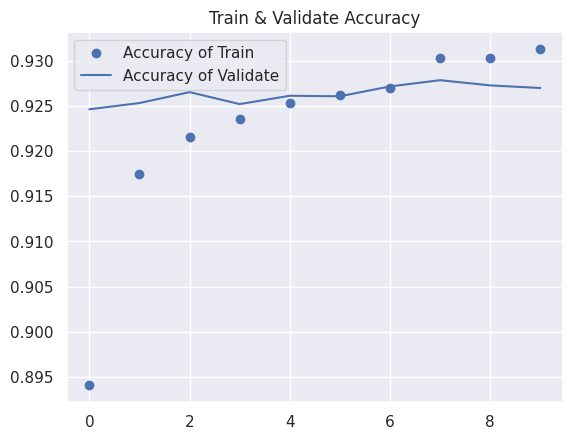

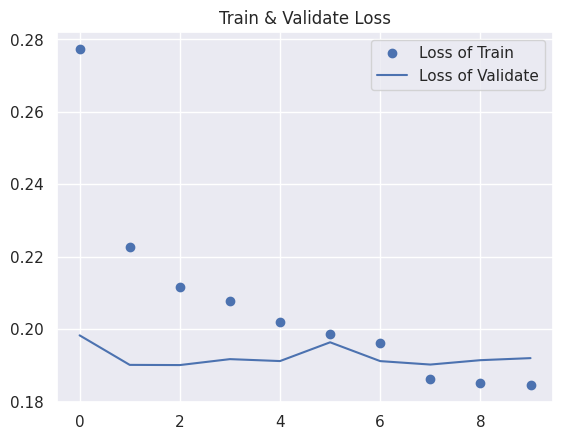

In [ ]:
accuracy_score = lstm_model2_history.history['acc']                          
validate_accuracy_score = lstm_model2_history.history['val_acc']
loss_score = lstm_model2_history.history['loss']
validate_loss_score = lstm_model2_history.history['val_loss']
plot.plot(accuracy_score, 'bo', label='Accuracy of Train')
plot.plot(validate_accuracy_score, 'b', label='Accuracy of Validate')
plot.title('Train & Validate Accuracy')
plot.legend()                                            

plot.figure()
plot.plot(loss_score, 'bo', label='Loss of Train')
plot.plot(validate_loss_score, 'b', label='Loss of Validate')
plot.title('Train & Validate Loss')
plot.legend()
plot.show() 

In [ ]:
# Load tokenizer object
with open('/content/tokenizer.pickle', 'rb') as handle:
    pickle_tokenizer = pickle.load(handle)

lstm_2_model = load_model('/content/lstm-2-layer-model.h5')
lstm_2_model.save('/content/drive/MyDrive/Colab_Notebooks/DL Model/Twitter Suicide Ideation Detection/LSTM-2-model.h5') 

post = ['I will be happy always']
print(post[0])
post_token = pickle_tokenizer.texts_to_sequences(post)
post_pad = pad_sequences(post_token, maxlen=60, dtype='int32')

pred = lstm_2_model.predict(post_pad,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post: ")

post1 = ['I will kill myself😩']
print(post1[0])
post1_token = pickle_tokenizer.texts_to_sequences(post1)
post1_pad = pad_sequences(post1_token, maxlen=60, dtype='int32')

pred = lstm_2_model.predict(post1_pad,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post")

I will be happy always
1/1 [==============================] - 1s 829ms/step
It is a Non Suicide Post: 
I will kill myself😩
1/1 [==============================] - 0s 87ms/step
It is a Suicide Post


# **GRU**

In [ ]:
# Define the hyperparameters
epochs = 10
embedding_dim = 120                     
batch_size = 128

# Build the model architecture
gru_model = Sequential()            
gru_model.add(Embedding(vocab_size,embedding_dim ,input_length=DL_x.shape[1]))
gru_model.add(SpatialDropout1D(0.5))
gru_model.add(GRU(units=16,  dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(228, activation='relu', kernel_regularizer=l2(0.01)))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = tf.optimizers.Adam()
loss = 'binary_crossentropy'
metrics = ['acc']
gru_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print a summary of the model architecture
print(gru_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 60, 120)           720000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 60, 120)          0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 16)                6624      
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 228)               3876      
                                                                 
 dropout_9 (Dropout)         (None, 228)               0         
                                                      

In [ ]:
cb_checkpoint = ModelCheckpoint(filepath="gru-model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
cb_earlyStopping = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
cb_reduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)
cbs=[cb_checkpoint, cb_earlyStopping, cb_reduceLR]
gru_model_history = gru_model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=cbs)

Epoch 1/10
1224/1224 [==============================] - ETA: 0s - loss: 0.3428 - acc: 0.8907
Epoch 1: val_acc improved from -inf to 0.92169, saving model to gru-model.h5
1224/1224 [==============================] - 306s 247ms/step - loss: 0.3428 - acc: 0.8907 - val_loss: 0.2243 - val_acc: 0.9217 - lr: 0.0010
Epoch 2/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2365 - acc: 0.9190
Epoch 2: val_acc did not improve from 0.92169
1224/1224 [==============================] - 257s 210ms/step - loss: 0.2365 - acc: 0.9190 - val_loss: 0.2217 - val_acc: 0.9204 - lr: 0.0010
Epoch 3/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2257 - acc: 0.9232
Epoch 3: val_acc did not improve from 0.92169
1224/1224 [==============================] - 254s 207ms/step - loss: 0.2257 - acc: 0.9232 - val_loss: 0.2325 - val_acc: 0.9199 - lr: 0.0010
Epoch 4/10
1224/1224 [==============================] - ETA: 0s - loss: 0.2207 - acc: 0.9243
Epoch 4: val_acc did not improve from 0

In [ ]:
gru_model_results = gru_model.evaluate(test_x, test_y, verbose=False)
print('--------GRU Model Results-------------')
print(f'Accuracy : {100*gru_model_results[1]}%')
print(f'Loss : {gru_model_results[0]}')

--------GRU Model Results-------------
Accuracy : 92.1766996383667%
Loss : 0.22462110221385956


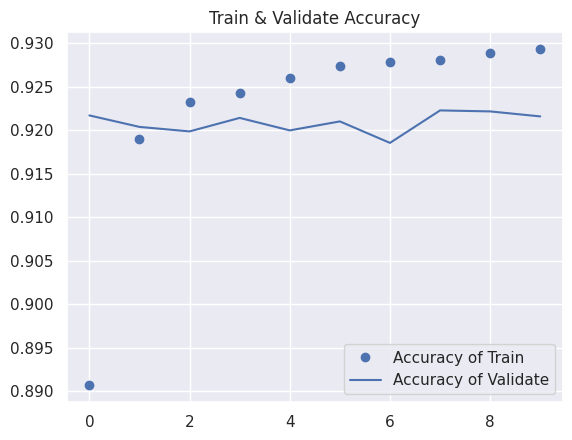

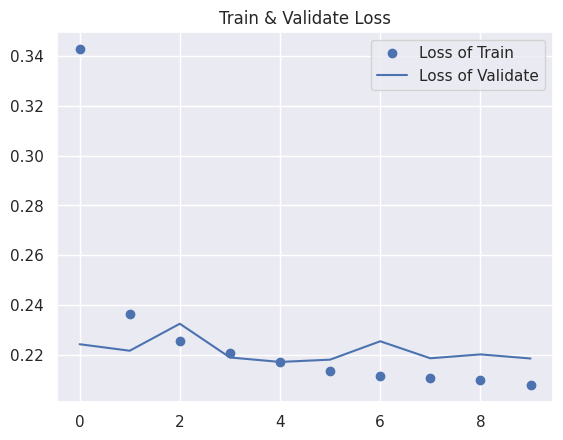

In [ ]:
accuracy_score = gru_model_history.history['acc']                          
validate_accuracy_score = gru_model_history.history['val_acc']
plot.plot(accuracy_score, 'bo', label='Accuracy of Train')
plot.plot(validate_accuracy_score, 'b', label='Accuracy of Validate')
plot.title('Train & Validate Accuracy')
plot.legend()                                            

plot.figure()
loss_score = gru_model_history.history['loss']
validate_loss_score = gru_model_history.history['val_loss']
plot.plot(loss_score, 'bo', label='Loss of Train')
plot.plot(validate_loss_score, 'b', label='Loss of Validate')
plot.title('Train & Validate Loss')
plot.legend()
plot.show()

In [ ]:
# Load tokenizer object
with open('/content/tokenizer.pickle', 'rb') as handle:
    pickle_tokenizer = pickle.load(handle)

model_gru = load_model('/content/gru-model.h5')
model_gru.save('/content/drive/MyDrive/nlp_project/GRU-model.h5') 

post = ['I will be happy always']
print(post[0])
post_token = pickle_tokenizer.texts_to_sequences(post)
post_pad = pad_sequences(post_token, maxlen=60, dtype='int32')

pred = model_gru.predict(post_pad,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post: ")

post1 = ['I will kill myself😩']
print(post1[0])
post1_token = pickle_tokenizer.texts_to_sequences(post1)
post1_pad = pad_sequences(post1_token, maxlen=60, dtype='int32')

pred = model_gru.predict(post1_pad,batch_size=1,verbose = True)
if(np.argmax(pred) == 0):
    print("It is a Suicide Post")
elif (np.argmax(pred) == 1):
    print("It is a Non Suicide Post")

I will be happy always
1/1 [==============================] - 0s 271ms/step
It is a Non Suicide Post: 
I will kill myself😩
1/1 [==============================] - 0s 31ms/step
It is a Suicide Post
